## The Start

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV


## Importing Datasets

In [3]:
#Importing MC1(Machine 2 Oct 2020) and MC2(Machine 2 Aug 2020) datasets

MC1csv = pd.read_csv("MC2Oct2020_csv.csv")

MC2csv = pd.read_csv("MC2Aug2020_csv.csv")


## Understanding Dataset MC1

In [3]:
MC1csv.head(10)

,Part,IC 2D,Lot,Date,Time,Machine,Server Result,Machine Result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,791-00529,24193,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1978.5,-1959.5,-1697.5,-1632.0,NaN
1,791-00529,24194,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1870.0,-1940.6,-1720.1,-1622.5,NaN
2,791-00529,24195,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1858.8,-1823.7,-1656.3,-1635.4,NaN
3,791-00529,24196,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-2199.4,-1955.0,-1658.9,-1694.4,NaN
4,791-00529,24197,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1875.9,-1765.4,-1654.6,-1665.2,NaN
5,791-00529,24198,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1900.0,-1778.2,-1657.6,-1646.0,NaN
6,791-00529,24199,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-2096.2,-1900.6,-1694.3,-1679.6,NaN
7,791-00529,24200,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1844.3,-1730.2,-1714.6,-1685.3,NaN
8,791-00529,24201,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-1764.6,-1692.9,-1755.7,-1777.8,NaN
9,791-00529,24202,P 8 7,1/10/2020,0:47:15,PA05-1901,OK,OK,-2073.1,-2207.3,-1674.6,-1666.3,NaN


In [4]:
#shape of the dataset
MC1csv.shape

(312389, 13)

In [12]:
#showing that Machine Results is 'OK' and 'NG'
MC1csv.groupby(['Date'])['Machine Result'].value_counts()

Date        Machine Result
1/10/2020   OK                16608
            NG                    6
10/10/2020  OK                11912
            NG                   59
12/10/2020  OK                 5285
            NG                   18
14/10/2020  OK                10359
            NG                  421
15/10/2020  OK                11346
            NG                  442
16/10/2020  OK                11477
            NG                  303
17/10/2020  OK                13612
            NG                  486
18/10/2020  OK                 2596
            NG                   45
19/10/2020  OK                 8016
            NG                   12
2/10/2020   OK                 8978
            NG                    4
20/10/2020  OK                 9558
            NG                  547
21/10/2020  OK                 9490
            NG                 1164
22/10/2020  OK                11012
            NG                 1017
23/10/2020  OK                11027
 

<AxesSubplot:title={'center':'MC2Oct2020'}, xlabel='Date'>

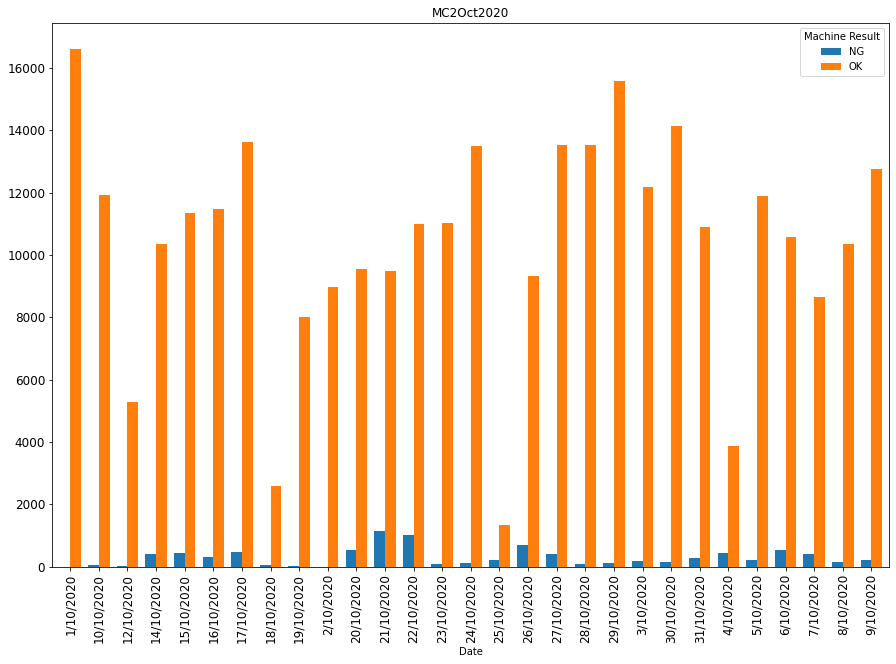

In [13]:
MC1csv.groupby(['Date'])['Machine Result'].value_counts().unstack().plot.bar(figsize=(15,10), fontsize = 12, width = 0.75, title='MC2Oct2020')

<AxesSubplot:>

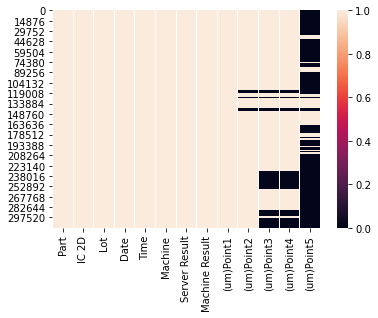

In [5]:
#showing missing values
sns.heatmap(data=MC1csv.notnull())

In [11]:
MC1csv.isnull().sum()

Part                   0
IC 2D                  0
Lot                    0
Date                   0
Time                   0
Machine                0
Server Result          0
Machine Result         0
(um)Point1             0
(um)Point2          8886
(um)Point3         56736
(um)Point4         56736
(um)Point5        243872
dtype: int64

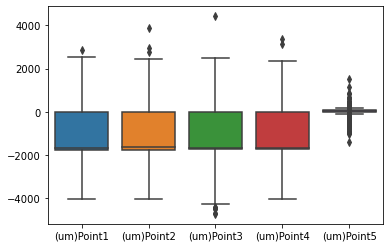

In [14]:
#Checking for outliers in the columns to be used 
MC1plot = pd.DataFrame(data = MC1csv, columns=["Machine Result","(um)Point1","(um)Point2","(um)Point3","(um)Point4","(um)Point5"])
sns.boxplot(data=MC1plot)
plt.show()


In [7]:
#numeralize the datasets in a way that can be understood
MC1plot.describe()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
count,312389.000000,303503.000000,255653.000000,255653.000000,68517.000000
mean,-1228.575127,-1224.976949,-1162.087512,-1157.855023,44.164985
std,841.065236,776.101944,827.437903,830.375651,68.203225
min,-4030.300000,-4008.600000,-4715.200000,-4043.500000,-1368.900000
25%,-1782.400000,-1744.700000,-1734.400000,-1731.800000,11.400000
50%,-1674.400000,-1601.900000,-1650.100000,-1655.500000,49.200000
75%,-6.900000,-3.100000,-2.600000,-1.200000,80.600000
max,2879.700000,3877.300000,4421.200000,3361.100000,1540.300000


In [15]:
#Checking for correlations between dataset features
#Point5 has the least correlation, so it will be experimentally dropped 
MC1plot.corr()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
(um)Point1,1.000000,0.954770,0.943452,0.942839,-0.042108
(um)Point2,0.954770,1.000000,0.968513,0.973653,-0.085128
(um)Point3,0.943452,0.968513,1.000000,0.982353,0.002315
(um)Point4,0.942839,0.973653,0.982353,1.000000,0.426310
(um)Point5,-0.042108,-0.085128,0.002315,0.426310,1.000000


## Understanding Dataset MC2

In [4]:
MC2csv.head(10)

,Part,IC 2D,Lot,Date,Time,Machine,Server Result,Machine Result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,791-00529,1,P 8 7,1/8/2020,8:38:33,PA05-1901,OK,OK,14.7,9.9,118.7,66.3,88.1
1,791-00529,1,P 8 7,1/8/2020,8:43:21,PA05-1901,OK,NG,12.4,5.9,14.2,279.9,288.6
2,791-00529,1,P 8 7,1/8/2020,8:46:05,PA05-1901,OK,OK,36.4,16.5,-39.5,40.3,74.8
3,791-00529,1,P 8 7,1/8/2020,12:43:41,PA05-1901,OK,OK,7.9,2.9,51.0,27.9,-15.5
4,791-00529,10,P 8 7,1/8/2020,8:46:34,PA05-1901,OK,NG,-3.8,-0.2,30.0,200.7,203.3
5,791-00529,10,P 8 7,1/8/2020,12:54:49,PA05-1901,OK,OK,23.9,26.3,45.2,49.5,-20.5
6,791-00529,100,P 8 7,1/8/2020,8:53:09,PA05-1901,OK,OK,2.5,11.3,25.2,32.4,68.3
7,791-00529,100,P 8 7,1/8/2020,13:07:01,PA05-1901,OK,OK,6.8,4.0,13.7,-12.3,-7.7
8,791-00529,1000,P 8 7,1/8/2020,10:00:55,PA05-1901,OK,NG,0.0,10.0,11.0,33.4,87.3
9,791-00529,1000,P 8 7,1/8/2020,16:11:21,PA05-1901,OK,OK,41.0,38.8,87.4,107.6,-15.8


In [5]:
#shape of the dataset
MC2csv.shape

(313338, 13)

In [14]:
#showing that Machine Results is 'OK' and 'NG'
MC2csv.groupby(['Date'])['Machine Result'].value_counts()


Date       Machine Result
1/8/2020   OK                 5628
           NG                 1141
10/8/2020  OK                 6173
           NG                  145
11/8/2020  OK                15130
           NG                   44
12/8/2020  OK                15620
           NG                   94
13/8/2020  OK                16426
           NG                   44
14/8/2020  OK                10699
           NG                  777
15/8/2020  OK                 9300
           NG                  276
16/8/2020  OK                 2267
           NG                    1
17/8/2020  OK                11074
           NG                  105
18/8/2020  OK                15548
           NG                  130
19/8/2020  OK                11197
           NG                  107
2/8/2020   OK                 3141
           NG                  730
20/8/2020  OK                 8239
           NG                  215
21/8/2020  OK                10137
           NG                

<AxesSubplot:title={'center':'MC2Aug2020'}, xlabel='Date'>

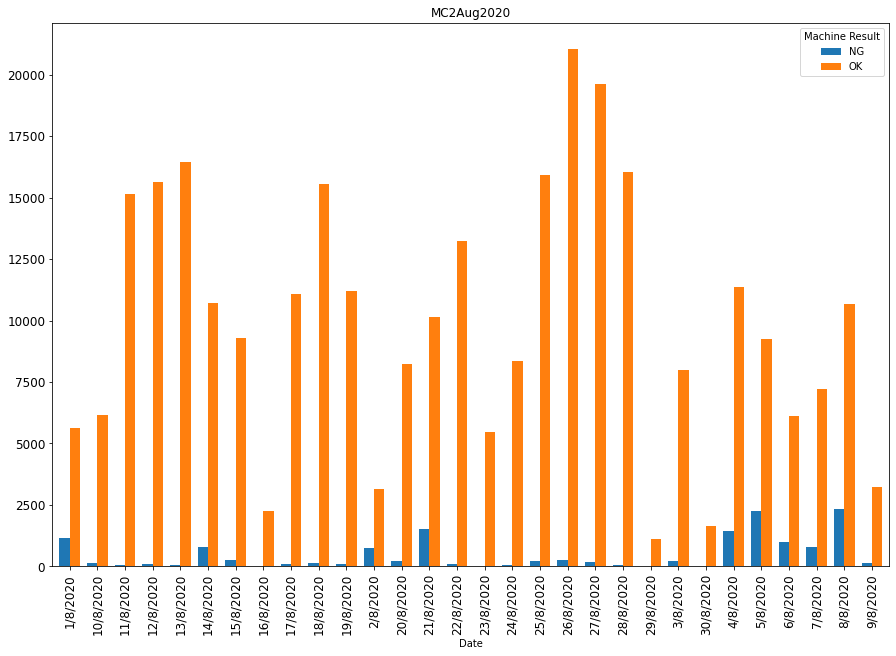

In [9]:
MC2csv.groupby(['Date'])['Machine Result'].value_counts().unstack().plot.bar(figsize=(15,10), fontsize = 12, width = 0.75,title='MC2Aug2020')

<AxesSubplot:>

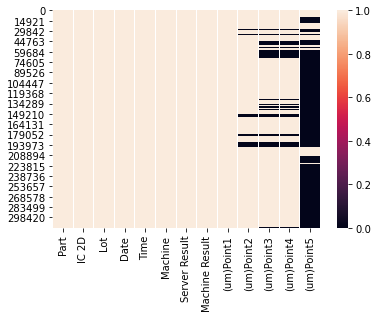

In [8]:
#showing missing values
sns.heatmap(data=MC2csv.notnull())

In [9]:
MC2csv.isnull().sum()

Part                   0
IC 2D                  0
Lot                    0
Date                   0
Time                   0
Machine                0
Server Result          0
Machine Result         0
(um)Point1             0
(um)Point2         21847
(um)Point3         46331
(um)Point4         46331
(um)Point5        265549
dtype: int64

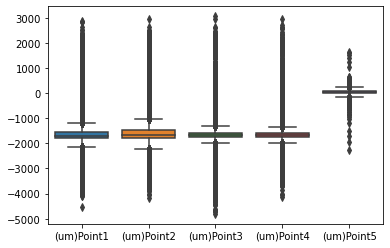

In [17]:
#Checking for outliers in the columns to be used 
MC2plot = pd.DataFrame(data = MC2csv, columns=["Machine Result","(um)Point1","(um)Point2","(um)Point3","(um)Point4","(um)Point5"])
sns.boxplot(data=MC2plot)
plt.show()

In [8]:
#numeralize the datasets in a way that can be understood
MC2plot.describe()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
count,313338.000000,291491.000000,267007.00000,267007.000000,47789.000000
mean,-1425.178895,-1409.301335,-1383.61513,-1368.365508,41.703254
std,714.450455,696.767710,708.27223,719.184741,76.035265
min,-4539.700000,-4184.300000,-4809.00000,-4123.200000,-2274.800000
25%,-1775.700000,-1768.600000,-1745.35000,-1744.900000,-8.300000
50%,-1688.700000,-1669.200000,-1679.30000,-1680.100000,37.700000
75%,-1535.900000,-1474.300000,-1574.30000,-1584.400000,86.600000
max,2891.200000,2972.500000,3064.20000,2940.300000,1625.600000


In [18]:
#Checking for correlations between dataset features
MC2plot.corr()

,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
(um)Point1,1.000000,0.950796,0.927812,0.897565,0.077741
(um)Point2,0.950796,1.000000,0.913608,0.898278,0.015676
(um)Point3,0.927812,0.913608,1.000000,0.949675,-0.248482
(um)Point4,0.897565,0.898278,0.949675,1.000000,0.193515
(um)Point5,0.077741,0.015676,-0.248482,0.193515,1.000000


## Main Dataset MC1

## For MC1 without POINT 5

In [3]:
#dropping unwanted columns
MC1 = MC1csv.drop(columns=['Part', 'IC 2D','Lot','Date','Time','Machine','Server Result'], axis=1)

#label encoding 'OK' and 'NG'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
MC1['Machine Result']=le.fit_transform(MC1['Machine Result'])


In [4]:
#dropping Point5
MC1DropP5 = MC1.drop('(um)Point5', axis=1)
MC1DropP5.head()


,Machine Result,(um)Point1,(um)Point2,(um)Point3,(um)Point4
0,1,-1978.5,-1959.5,-1697.5,-1632.0
1,1,-1870.0,-1940.6,-1720.1,-1622.5
2,1,-1858.8,-1823.7,-1656.3,-1635.4
3,1,-2199.4,-1955.0,-1658.9,-1694.4
4,1,-1875.9,-1765.4,-1654.6,-1665.2


In [5]:
#detecting outliers
#filling up missing values with -mean, -median, -zero
Q1MC1 = MC1.quantile(0.25)
Q3MC1 = MC1.quantile(0.75)
IQR1 = Q3MC1-Q1MC1

MC1mean = MC1.mean()
MC1median = MC1.median()

MC1DropP5[(MC1DropP5<(Q1MC1 - 1.5 * IQR1))|(MC1DropP5>(Q3MC1 + 1.5 * IQR1))]=np.nan

MC1DropP5Mean = MC1DropP5.fillna(MC1mean) 
MC1DropP5Median = MC1DropP5.fillna(MC1median)
MC1DropP5Zero = MC1DropP5.fillna(0)



<ipython-input-5-a53e437176ea>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  MC1DropP5[(MC1DropP5<(Q1MC1 - 1.5 * IQR1))|(MC1DropP5>(Q3MC1 + 1.5 * IQR1))]=np.nan
<ipython-input-5-a53e437176ea>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  MC1DropP5[(MC1DropP5<(Q1MC1 - 1.5 * IQR1))|(MC1DropP5>(Q3MC1 + 1.5 * IQR1))]=np.nan


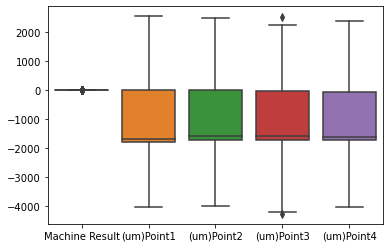

In [15]:
sns.boxplot(data=MC1DropP5Mean)
plt.show()

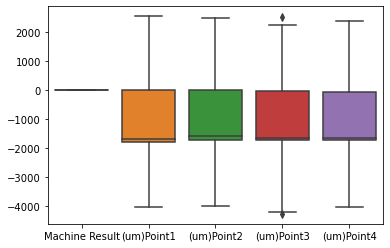

In [16]:
sns.boxplot(data=MC1DropP5Median)
plt.show()

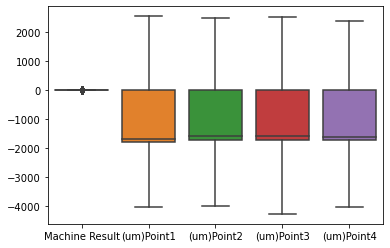

In [31]:
sns.boxplot(data=MC1DropP5Zero)
plt.show()

## Splitting and Normalizing MC1DropP5Mean

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1DropP5Mean.drop('Machine Result', axis=1)
y = le.fit_transform(MC1DropP5Mean['Machine Result'])

In [7]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


## KNN MC1DropP5Mean

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))



Before tuning KNN
Mean squared error: 0.012036159696791211
Accuracy score: 0.9879638403032088
Precision score:  0.9892352457626012
Recall score:  0.9984854271753876
F1 score:  0.9938388128572178
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.96      0.81      0.87     78098
weighted avg       0.99      0.99      0.99     78098



In [26]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [14]:
parameters = [{'weights': ['uniform', 'distance'],'n_neighbors': list(np.arange(1, 100, 1))}] 

grid = GridSearchCV(knn, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 


KNeighborsClassifier(n_neighbors=16, weights='distance')


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print( classification_report(ytest, ypred))


After tuning KNN
Mean squared error: 0.011780071192604165
Accuracy score: 0.9882199288073958
Precision score:  0.988995658239566
Recall score:  0.9989990649159083
F1 score:  0.9939721934663819
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.97      0.80      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## SVM MC1DropP5Mean (not worth it, took 5 hours and more)

In [8]:
from sklearn.svm import SVC #SVM library from sklearn
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

svm = SVC()
svm.fit(Xtrain, ytrain)

ypred = svm.predict(Xtest)
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))

print( classification_report(ytest, ypred))

Mean squared error: 0.017670106788906247
Accuracy score: 0.9823298932110938
              precision    recall  f1-score   support

           0       0.98      0.37      0.54      2169
           1       0.98      1.00      0.99     75929

    accuracy                           0.98     78098
   macro avg       0.98      0.69      0.77     78098
weighted avg       0.98      0.98      0.98     78098



In [23]:
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 
               'gamma': [ 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['linear','rbf'] 
              }] 

grid = GridSearchCV(svm, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [20]:
from sklearn.svm import SVC #SVM library from sklearn
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

svm = SVC() #put gridsearch parameters into here
svm.fit(Xtrain, ytrain)

ypred = svm.predict(Xtest)
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))

print( classification_report(ytest, ypred))

Mean squared error: 0.017670106788906247
Accuracy score: 0.9823298932110938
              precision    recall  f1-score   support

           0       0.98      0.37      0.54      2169
           1       0.98      1.00      0.99     75929

    accuracy                           0.98     78098
   macro avg       0.98      0.69      0.77     78098
weighted avg       0.98      0.98      0.98     78098



## GaussianNB MC1DropP5Mean

In [51]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.2565878767702118
Accuracy score: 0.7434121232297882
Precision score:  0.983527701837561
Recall score:  0.7486204217097552
F1 score:  0.8501454499226012
              precision    recall  f1-score   support

           0       0.06      0.56      0.11      2169
           1       0.98      0.75      0.85     75929

    accuracy                           0.74     78098
   macro avg       0.52      0.65      0.48     78098
weighted avg       0.96      0.74      0.83     78098



In [36]:
gnb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [37]:
parameters = [{'var_smoothing': np.logspace(0,-9, num=100) 
              }] 

grid = GridSearchCV(gnb, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

GaussianNB(var_smoothing=0.3511191734215131)


In [8]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=0.3511191734215131)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse)
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre)
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print( classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.023649773361673794
Accuracy score: 0.9763502266383262
Precision score:  0.9762523143386135
Recall score:  1.0
F1 score:  0.9879834748381641
              precision    recall  f1-score   support

           0       1.00      0.15      0.26      2169
           1       0.98      1.00      0.99     75929

    accuracy                           0.98     78098
   macro avg       0.99      0.57      0.62     78098
weighted avg       0.98      0.98      0.97     78098



## RandomForestClassifier MC1DropP5Mean

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.012151399523675383
Accuracy score: 0.9878486004763246
Precision score:  0.989425587467363
Recall score:  0.9981693424119902
F1 score:  0.9937782323361459
              precision    recall  f1-score   support

           0       0.91      0.63      0.74      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.81      0.87     78098
weighted avg       0.99      0.99      0.99     78098



In [11]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [12]:
parameters = [{'n_estimators':list(np.arange(1, 100, 1))
              }] 

grid = GridSearchCV(rfc, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

RandomForestClassifier(n_estimators=75)


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=75)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print( classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.012010550846372507
Accuracy score: 0.9879894491536275
Precision score:  0.989388777947453
Recall score:  0.9983537251906386
F1 score:  0.9938510350976099
              precision    recall  f1-score   support

           0       0.92      0.63      0.74      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.81      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## Logistic Regression MC1DropP5Mean (not worth it as well)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

ypred = lr.predict(Xtest)
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
#print("Precision score: ", precision_score(ytest, ypred))
#print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
#print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Mean squared error: 0.027772798279085253
Accuracy score: 0.9722272017209147
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2169
           1       0.97      1.00      0.99     75929

    accuracy                           0.97     78098
   macro avg       0.49      0.50      0.49     78098
weighted avg       0.95      0.97      0.96     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [14]:
parameters = [{'max_iter':list(np.arange(1000, 10000, 1000)),
               'C': list(np.arange(1000, 2000, 50)), 
               'tol':[1e-6,1e-5,1e-4], 
               'fit_intercept':[True, False], 
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
              }] 

grid = GridSearchCV(lr, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 


C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\sit

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\sit

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\sit

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\sit

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\

C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Nathan Ting\anaconda3\lib\site-packages\scipy\optimize\linesearch.py

LogisticRegression(C=1000, max_iter=1000, solver='newton-cg', tol=1e-06)


In [27]:
#previous testing parameters = [{'max_iter':5000,
               #'C': list(np.arange(1000, 2000, 50)), 
               #'tol':[1e-6,1e-5,1e-4], 
               #'fit_intercept':[True, False], 
               #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
              #}] 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

lr = LogisticRegression(C=1000, max_iter=5000, solver='newton-cg', tol=1e-05)
lr.fit(Xtrain, ytrain)

ypred = lr.predict(Xtest)
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
#print("Precision score: ", precision_score(ytest, ypred))
#print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
#print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Mean squared error: 0.027772798279085253
Accuracy score: 0.9722272017209147
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2169
           1       0.97      1.00      0.99     75929

    accuracy                           0.97     78098
   macro avg       0.49      0.50      0.49     78098
weighted avg       0.95      0.97      0.96     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#previous parameters parameters = [{'max_iter':list(np.arange(1000, 10000, 1000)),
               #'C': list(np.arange(1000, 2000, 50)), 
               #'tol':[1e-6,1e-5,1e-4], 
               #'fit_intercept':[True, False], 
               #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
              #}] 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

lr = LogisticRegression(C=1000, max_iter=1000, solver='newton-cg', tol=1e-06)
lr.fit(Xtrain, ytrain)

ypred = lr.predict(Xtest)
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
#print("Precision score: ", precision_score(ytest, ypred))
#print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
#print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Mean squared error: 0.027772798279085253
Accuracy score: 0.9722272017209147
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2169
           1       0.97      1.00      0.99     75929

    accuracy                           0.97     78098
   macro avg       0.49      0.50      0.49     78098
weighted avg       0.95      0.97      0.96     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparing Model Results

In [66]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1),
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC1DropP5Mean')
bestmodel


,KNN,GNB,RFC
Accuracy,0.988220,0.976350,0.987989
Mean-squared Error,0.011780,0.023650,0.012011
Precision,0.988996,0.976252,0.989389
Recall,0.998999,1.000000,0.998354
F1,0.993972,0.987983,0.993851


## Splitting and Normalizing MC1DropP5Median

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1DropP5Median.drop('Machine Result', axis=1)
y = le.fit_transform(MC1DropP5Median['Machine Result'])

In [8]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC1DropP5Median

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))



Before tuning KNN
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [10]:
parameters = [{'weights': ['uniform', 'distance'],'n_neighbors': list(np.arange(1, 100, 1))}] 

grid = GridSearchCV(knn, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 


KNeighborsClassifier(n_neighbors=1)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print( classification_report(ytest, ypred))


After tuning KNN
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## GaussianNB MC1DropP5Median

In [14]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [15]:
parameters = [{'var_smoothing': np.logspace(0,-9, num=100) 
              }] 

grid = GridSearchCV(gnb, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

GaussianNB(var_smoothing=1.0)


In [16]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## RandomForestClassifier MC1DropP5Median

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)



ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [10]:
parameters = [{'n_estimators':list(np.arange(1, 100, 1))
              }] 

grid = GridSearchCV(rfc, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

RandomForestClassifier(n_estimators=1)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

rfc=RandomForestClassifier(n_estimators=1)
rfc.fit(Xtrain, ytrain)

ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## Splitting and Normalizing MC1DropP5Zero

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1DropP5Zero.drop('Machine Result', axis=1)
y = le.fit_transform(MC1DropP5Zero['Machine Result'])

In [10]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC1DropP5Zero

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))



Before tuning KNN
Mean squared error: 0.011869702169069631
Accuracy score: 0.9881302978309303
Precision score:  0.9893136743215031
Recall score:  0.9985776185647117
F1 score:  0.9939240605889794
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.96      0.81      0.87     78098
weighted avg       0.99      0.99      0.99     78098



In [35]:
parameters = [{'weights': ['uniform', 'distance'],'n_neighbors': list(np.arange(1, 100, 1))}] 

grid = GridSearchCV(knn, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 


KNeighborsClassifier(n_neighbors=16, weights='distance')


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print( classification_report(ytest, ypred))



After tuning KNN
Mean squared error: 0.011613613664882583
Accuracy score: 0.9883863863351174
Precision score:  0.9891122933291608
Recall score:  0.9990517457098078
F1 score:  0.9940571743075984
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.97      0.81      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## GaussianNB MC1DropP5Zero

In [37]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.03833644907680094
Accuracy score: 0.9616635509231991
Precision score:  0.983378179552775
Recall score:  0.9770838546536896
F1 score:  0.9802209127183363
              precision    recall  f1-score   support

           0       0.34      0.42      0.38      2169
           1       0.98      0.98      0.98     75929

    accuracy                           0.96     78098
   macro avg       0.66      0.70      0.68     78098
weighted avg       0.97      0.96      0.96     78098



In [38]:
parameters = [{'var_smoothing': np.logspace(0,-9, num=100) 
              }] 

grid = GridSearchCV(gnb, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

GaussianNB(var_smoothing=0.1873817422860384)


In [11]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=0.1873817422860384)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse)
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre)
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print( classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.023316858306230634
Accuracy score: 0.9766831416937694
Precision score:  0.976603297918864
Recall score:  0.9999736596030502
F1 score:  0.988150317227916
              precision    recall  f1-score   support

           0       0.99      0.16      0.28      2169
           1       0.98      1.00      0.99     75929

    accuracy                           0.98     78098
   macro avg       0.99      0.58      0.63     78098
weighted avg       0.98      0.98      0.97     78098



## RandomForestClassifier MC1DropP5Zero

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.011882506594278983
Accuracy score: 0.988117493405721
Precision score:  0.9895818374087758
Recall score:  0.9982878741982641
F1 score:  0.9939157914060555
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.82      0.87     78098
weighted avg       0.99      0.99      0.99     78098



In [41]:
parameters = [{'n_estimators':list(np.arange(1, 100, 1))
              }] 

grid = GridSearchCV(rfc, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

RandomForestClassifier(n_estimators=99)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=99)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print( classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.011869702169069631
Accuracy score: 0.9881302978309303
Precision score:  0.9895308461478213
Recall score:  0.9983537251906386
F1 score:  0.9939227062641361
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.81      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## Comparing Model Results

In [56]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1),
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC1DropP5Zero')
bestmodel


,KNN,GNB,RFC
Accuracy,0.988386,0.976734,0.988130
Mean-squared Error,0.011614,0.023266,0.011870
Precision,0.989112,0.976654,0.989531
Recall,0.999052,0.999974,0.998354
F1,0.994057,0.988176,0.993923


## For MC1 with POINT 5

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#dropping unwanted columns 
MC1 = MC1csv.drop(columns=['Part', 'IC 2D','Lot','Date','Time','Machine','Server Result'], axis=1)

#label encoding 'OK' and 'NG'
MC1['Machine Result']=le.fit_transform(MC1['Machine Result'])

MC1.head()

,Machine Result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,1,-1978.5,-1959.5,-1697.5,-1632.0,NaN
1,1,-1870.0,-1940.6,-1720.1,-1622.5,NaN
2,1,-1858.8,-1823.7,-1656.3,-1635.4,NaN
3,1,-2199.4,-1955.0,-1658.9,-1694.4,NaN
4,1,-1875.9,-1765.4,-1654.6,-1665.2,NaN


In [17]:
#detecting outliers
#filling up missing values with -mean, -median, -zero
Q1MC1 = MC1.quantile(0.25)
Q3MC1 = MC1.quantile(0.75)
IQR1 = Q3MC1-Q1MC1

MC1mean = MC1.mean()
MC1median = MC1.median()

MC1[(MC1<(Q1MC1 - 1.5 * IQR1))|(MC1>(Q3MC1 + 1.5 * IQR1))]=np.nan
MC1Mean = MC1.fillna(MC1mean) 
MC1Median = MC1.fillna(MC1median)
MC1Zero = MC1.fillna(0)


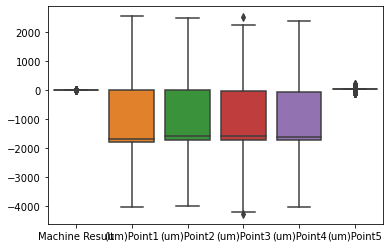

In [21]:
sns.boxplot(data=MC1Mean)
plt.show()

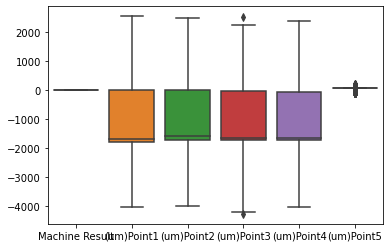

In [22]:
sns.boxplot(data=MC1Median)
plt.show()

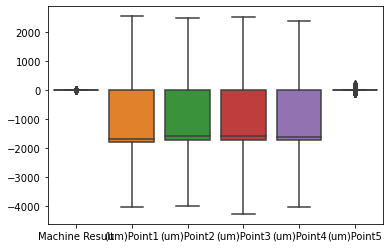

In [23]:
sns.boxplot(data=MC1Zero)
plt.show()

## Splitting and Normalizing MC1Mean

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1Mean.drop('Machine Result', axis=1)
y = le.fit_transform(MC1Mean['Machine Result'])

In [15]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC1Mean

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning KNN
Mean squared error: 0.009078337473430818
Accuracy score: 0.9909216625265692
Precision score:  0.9920842601072877
Recall score:  0.9986302993586114
F1 score:  0.9953465171076209
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2169
           1       0.99      1.00      1.00     75929

    accuracy                           0.99     78098
   macro avg       0.96      0.86      0.91     78098
weighted avg       0.99      0.99      0.99     78098



In [132]:
parameters = [{'weights': ['uniform', 'distance'],'n_neighbors': list(np.arange(1, 100, 1))}] 

grid = GridSearchCV(knn, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print(classification_report(ytest, ypred))

After tuning KNN
Mean squared error: 0.01268918538246818
Accuracy score: 0.9873108146175318
Precision score:  0.9888833798700452
Recall score:  0.9981693424119902
F1 score:  0.9935046634026126
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.80      0.86     78098
weighted avg       0.99      0.99      0.99     78098



## GaussianNB MC1Mean

In [66]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.1143179082690978
Accuracy score: 0.8856820917309022
Precision score:  0.9815850380230869
Recall score:  0.8992874922625084
F1 score:  0.93863580128117
              precision    recall  f1-score   support

           0       0.10      0.41      0.17      2169
           1       0.98      0.90      0.94     75929

    accuracy                           0.89     78098
   macro avg       0.54      0.65      0.55     78098
weighted avg       0.96      0.89      0.92     78098



In [ ]:
parameters = [{'var_smoothing': np.logspace(0,-9, num=100) 
              }] 

grid = GridSearchCV(gnb, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [30]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse )
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre )
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.024674127378421982
Accuracy score: 0.975325872621578
Precision score:  0.9753102278858259
Recall score:  0.9999341490076256
F1 score:  0.9874687042757274
              precision    recall  f1-score   support

           0       0.98      0.11      0.20      2169
           1       0.98      1.00      0.99     75929

    accuracy                           0.98     78098
   macro avg       0.98      0.56      0.60     78098
weighted avg       0.98      0.98      0.97     78098



## RandomForestClassifier MC1Mean

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.009155164024686932
Accuracy score: 0.990844835975313
Precision score:  0.9923542195805295
Recall score:  0.9982747039997892
F1 score:  0.9953056575033976
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2169
           1       0.99      1.00      1.00     75929

    accuracy                           0.99     78098
   macro avg       0.96      0.86      0.91     78098
weighted avg       0.99      0.99      0.99     78098



In [ ]:
parameters = [{'n_estimators':list(np.arange(1, 100, 1))
              }] 

grid = GridSearchCV(rfc, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=67)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.011741657916976107
Accuracy score: 0.9882583420830239
Precision score:  0.9899926839464883
Recall score:  0.9980113000302915
F1 score:  0.9939858204403402
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.82      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## Comparing Model Results

In [32]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1)
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC1Mean')
bestmodel


,KNN,GNB,RFC
Accuracy,0.987311,0.975326,0.988258
Mean-squared Error,0.012689,0.024674,0.011742
Precision,0.988883,0.975310,0.989993
Recall,0.998169,0.999934,0.998011
F1,0.993505,0.987469,0.993986


## Splitting and Normalizing MC1Median

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1Median.drop('Machine Result', axis=1)
y = le.fit_transform(MC1Median['Machine Result'])

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC1Median

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [ ]:
parameters = [{'weights': ['uniform', 'distance'],'n_neighbors': list(np.arange(1, 100, 1))}] 

grid = GridSearchCV(knn, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

## GaussianNB MC1Median

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [ ]:
parameters = [{'var_smoothing': np.logspace(0,-9, num=100) 
              }] 

grid = GridSearchCV(gnb, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

## RandomForestClassifier MC1Median

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)



ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [ ]:
parameters = [{'n_estimators':list(np.arange(1, 100, 1))
              }] 

grid = GridSearchCV(rfc, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=1)
rfc.fit(Xtrain, ytrain)



ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

## Splitting and Normalizing MC1Zero

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1Zero.drop('Machine Result', axis=1)
y = le.fit_transform(MC1Zero['Machine Result'])

In [34]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC1Zero

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [ ]:
parameters = [{'weights': ['uniform', 'distance'],'n_neighbors': list(np.arange(1, 100, 1))}] 

grid = GridSearchCV(knn, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print(classification_report(ytest, ypred))

After tuning KNN
Mean squared error: 0.012817229634561705
Accuracy score: 0.9871827703654383
Precision score:  0.9889329713927751
Recall score:  0.9979849596333417
F1 score:  0.9934383460174497
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.94      0.80      0.86     78098
weighted avg       0.99      0.99      0.99     78098



## GaussianNB MC1Zero

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [ ]:
parameters = [{'var_smoothing': np.logspace(0,-9, num=100) 
              }] 

grid = GridSearchCV(gnb, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [36]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=0.657933224657568)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse )
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre )
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.024635714102793926
Accuracy score: 0.975364285897206
Precision score:  0.9754821963223295
Recall score:  0.9997892768244018
F1 score:  0.9874861788617887
              precision    recall  f1-score   support

           0       0.94      0.12      0.21      2169
           1       0.98      1.00      0.99     75929

    accuracy                           0.98     78098
   macro avg       0.96      0.56      0.60     78098
weighted avg       0.97      0.98      0.97     78098



## RandomForestClassifier MC1Zero

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [ ]:
parameters = [{'n_estimators':list(np.arange(1, 100, 1))
              }] 

grid = GridSearchCV(rfc, parameters)
grid.fit(Xtrain, ytrain)
 
print(grid.best_estimator_) #print how the model looks after hyper parameter tuning 

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=51)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.011703244641348049
Accuracy score: 0.9882967553586519
Precision score:  0.9900827094194661
Recall score:  0.9979586192363918
F1 score:  0.9940050635568206
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.95      0.82      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## Comparing Model Results

In [38]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1)
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC1Zero')
bestmodel


,KNN,GNB,RFC
Accuracy,0.987183,0.975364,0.988297
Mean-squared Error,0.012817,0.024636,0.011703
Precision,0.988933,0.975482,0.990083
Recall,0.997985,0.999789,0.997959
F1,0.993438,0.987486,0.994005


## Supporting Dataset MC2

## For MC2 without POINT 5 (Support)

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#dropping unwanted columns
MC2 = MC2csv.drop(columns=['Part', 'IC 2D','Lot','Date','Time','Machine','Server Result'], axis=1)
#label encoding 'OK' and 'NG'
MC2['Machine Result']=le.fit_transform(MC2['Machine Result'])

In [92]:
#drop Point5
MC2DropP5 = MC2.drop('(um)Point5', axis=1)
MC2DropP5.head()

,Machine Result,(um)Point1,(um)Point2,(um)Point3,(um)Point4
0,1,14.7,9.9,118.7,66.3
1,0,12.4,5.9,14.2,279.9
2,1,36.4,16.5,-39.5,40.3
3,1,7.9,2.9,51.0,27.9
4,0,-3.8,-0.2,30.0,200.7


In [93]:
#detecting outliers
#filling up missing values with -mean, -median, -zero
Q1MC2 = MC2.quantile(0.25)
Q3MC2 = MC2.quantile(0.75)
IQR2 = Q3MC2-Q1MC2

MC2mean = MC2.mean()
MC2median = MC2.median()

MC2DropP5[(MC2DropP5<(Q1MC2 - 1.5 * IQR2))|(MC2DropP5>(Q3MC2 + 1.5 * IQR2))]=np.nan
MC2DropP5Mean = MC2DropP5.fillna(MC2mean) 
MC2DropP5Median = MC2DropP5.fillna(MC2median)
MC2DropP5Zero = MC2DropP5.fillna(0) 


<ipython-input-93-e8e23675457e>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  MC2DropP5[(MC2DropP5<(Q1MC2 - 1.5 * IQR2))|(MC2DropP5>(Q3MC2 + 1.5 * IQR2))]=np.nan
<ipython-input-93-e8e23675457e>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  MC2DropP5[(MC2DropP5<(Q1MC2 - 1.5 * IQR2))|(MC2DropP5>(Q3MC2 + 1.5 * IQR2))]=np.nan


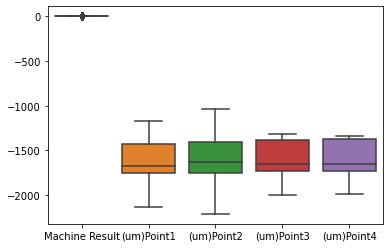

In [72]:
sns.boxplot(data=MC2DropP5Mean)
plt.show()

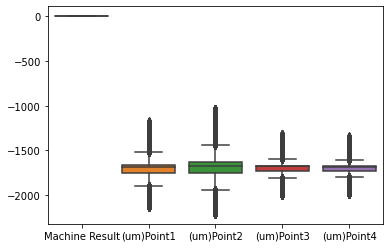

In [73]:
sns.boxplot(data=MC2DropP5Median)
plt.show()

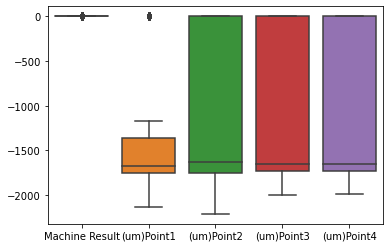

In [74]:
sns.boxplot(data=MC2DropP5Zero)
plt.show()

## Splitting and Normalizing MC2DropP5Mean

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC2DropP5Mean.drop('Machine Result', axis=1)
y = le.fit_transform(MC2DropP5Mean['Machine Result'])

In [98]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


## KNN MC2DropP5Mean

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning KNN
Mean squared error: 0.044603306312631645
Accuracy score: 0.9553966936873683
Precision score:  0.9579020368325071
Recall score:  0.9971124538794717
F1 score:  0.9771140368114233
              precision    recall  f1-score   support

           0       0.54      0.07      0.13      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.75      0.53      0.55     78335
weighted avg       0.94      0.96      0.94     78335



In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print( classification_report(ytest, ypred))


After tuning KNN
Mean squared error: 0.04502457394523521
Accuracy score: 0.9549754260547648
Precision score:  0.9580018762931644
Recall score:  0.9965376183091813
F1 score:  0.9768898615488445
              precision    recall  f1-score   support

           0       0.50      0.07      0.13      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.95     78335
   macro avg       0.73      0.54      0.55     78335
weighted avg       0.94      0.95      0.94     78335



## GaussianNB MC2DropP5Mean

In [79]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.2102253143550137
Accuracy score: 0.7897746856449863
Precision score:  0.9897575391228424
Recall score:  0.7880059889845463
F1 score:  0.8774337600476333
              precision    recall  f1-score   support

           0       0.16      0.83      0.26      3531
           1       0.99      0.79      0.88     74804

    accuracy                           0.79     78335
   macro avg       0.57      0.81      0.57     78335
weighted avg       0.95      0.79      0.85     78335



In [100]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=0.3511191734215131)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse)
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre)
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print( classification_report(ytest, ypred))

Mean squared error: 0.05240314035871577
Accuracy score: 0.9475968596412843
Precision score:  0.9546734922247804
Recall score:  0.9922330356665419
F1 score:  0.9730909662997949
              precision    recall  f1-score   support

           0       0.01      0.00      0.00      3531
           1       0.95      0.99      0.97     74804

    accuracy                           0.95     78335
   macro avg       0.48      0.50      0.49     78335
weighted avg       0.91      0.95      0.93     78335



## RandomForestClassifier MC2DropP5Mean

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.04473096317099636
Accuracy score: 0.9552690368290037
Precision score:  0.9579672164842505
Recall score:  0.9968985615742474
F1 score:  0.9770452282375138
              precision    recall  f1-score   support

           0       0.53      0.07      0.13      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.74      0.54      0.55     78335
weighted avg       0.94      0.96      0.94     78335



In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=75)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print( classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.04487138571519755
Accuracy score: 0.9551286142848024
Precision score:  0.9578789163358896
Recall score:  0.9968450884979413
F1 score:  0.9769736195635798
              precision    recall  f1-score   support

           0       0.52      0.07      0.13      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.74      0.53      0.55     78335
weighted avg       0.94      0.96      0.94     78335



## Comparing Model Results

In [103]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1)
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC2DropP5Mean')
bestmodel


,KNN,GNB,RFC
Accuracy,0.954975,0.947597,0.955129
Mean-squared Error,0.045025,0.052403,0.044871
Precision,0.958002,0.954673,0.957879
Recall,0.996538,0.992233,0.996845
F1,0.976890,0.973091,0.976974


## Splitting and Normalizing MC2DropP5Median

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC2DropP5Median.drop('Machine Result', axis=1)
y = le.fit_transform(MC2DropP5Median['Machine Result'])

In [57]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC2DropP5Median

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))



Before tuning KNN
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print( classification_report(ytest, ypred))


After tuning KNN
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## GaussianNB MC2DropP5Median

In [14]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [16]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## RandomForestClassifier MC2DropP5Median

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)

ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=1)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78098

    accuracy                           1.00     78098
   macro avg       1.00      1.00      1.00     78098
weighted avg       1.00      1.00      1.00     78098



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## Splitting and Normalizing MC2DropP5Zero

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC2DropP5Zero.drop('Machine Result', axis=1)
y = le.fit_transform(MC2DropP5Zero['Machine Result'])

In [105]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC2DropP5Zero

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))



Before tuning KNN
Mean squared error: 0.16426884534371608
Accuracy score: 0.8357311546562839
Precision score:  0.9893186702060422
Recall score:  0.8370140634190685
F1 score:  0.9068157460243895
              precision    recall  f1-score   support

           0       0.19      0.81      0.31      3531
           1       0.99      0.84      0.91     74804

    accuracy                           0.84     78335
   macro avg       0.59      0.82      0.61     78335
weighted avg       0.95      0.84      0.88     78335



In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print( classification_report(ytest, ypred))


After tuning KNN
Mean squared error: 0.04462883768430459
Accuracy score: 0.9553711623156954
Precision score:  0.9582069603660104
Recall score:  0.9967381423453291
F1 score:  0.9770928343030876
              precision    recall  f1-score   support

           0       0.53      0.08      0.14      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.75      0.54      0.56     78335
weighted avg       0.94      0.96      0.94     78335



## GaussianNB MC2DropP5Zero

In [84]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.2102253143550137
Accuracy score: 0.7897746856449863
Precision score:  0.9897575391228424
Recall score:  0.7880059889845463
F1 score:  0.8774337600476333
              precision    recall  f1-score   support

           0       0.16      0.83      0.26      3531
           1       0.99      0.79      0.88     74804

    accuracy                           0.79     78335
   macro avg       0.57      0.81      0.57     78335
weighted avg       0.95      0.79      0.85     78335



In [78]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=0.1873817422860384)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse)
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre)
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print( classification_report(ytest, ypred))

Mean squared error: 0.17176230292972489
Accuracy score: 0.8282376970702751
Precision score:  0.9866419177256358
Recall score:  0.8313860221378536
F1 score:  0.9023847007697497
              precision    recall  f1-score   support

           0       0.18      0.76      0.29      3531
           1       0.99      0.83      0.90     74804

    accuracy                           0.83     78335
   macro avg       0.58      0.80      0.59     78335
weighted avg       0.95      0.83      0.87     78335



## RandomForestClassifier MC2DropP5Zero

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.044820322971851664
Accuracy score: 0.9551796770281483
Precision score:  0.9579399031358795
Recall score:  0.9968317202288648
F1 score:  0.9769989190605654
              precision    recall  f1-score   support

           0       0.52      0.07      0.13      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.74      0.53      0.55     78335
weighted avg       0.94      0.96      0.94     78335



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=99)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print( classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.044756494542669306
Accuracy score: 0.9552435054573307
Precision score:  0.9579896708548524
Recall score:  0.9968450884979413
F1 score:  0.9770312233854378
              precision    recall  f1-score   support

           0       0.53      0.07      0.13      3531
           1       0.96      1.00      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.74      0.54      0.55     78335
weighted avg       0.94      0.96      0.94     78335



## Comparing Model Results

In [80]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1),
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC2DropP5Zero')
bestmodel


,KNN,GNB,RFC
Accuracy,0.955371,0.828238,0.955244
Mean-squared Error,0.044629,0.171762,0.044756
Precision,0.958207,0.986642,0.957990
Recall,0.996738,0.831386,0.996845
F1,0.977093,0.902385,0.977031


## For MC2 with POINT 5 (Support)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#dropping unwanted columns
MC2 = MC2csv.drop(columns=['Part', 'IC 2D','Lot','Date','Time','Machine','Server Result'], axis=1)
#label encoding 'OK' and 'NG'
MC2['Machine Result']=le.fit_transform(MC2['Machine Result'])

MC2.head()

,Machine Result,(um)Point1,(um)Point2,(um)Point3,(um)Point4,(um)Point5
0,1,14.7,9.9,118.7,66.3,88.1
1,0,12.4,5.9,14.2,279.9,288.6
2,1,36.4,16.5,-39.5,40.3,74.8
3,1,7.9,2.9,51.0,27.9,-15.5
4,0,-3.8,-0.2,30.0,200.7,203.3


In [22]:
#detecting outliers
#filling up missing values with -mean, -median, -zero
Q1MC2 = MC2.quantile(0.25)
Q3MC2 = MC2.quantile(0.75)
IQR2 = Q3MC2-Q1MC2

MC2mean = MC2.mean()
MC2median = MC2.median()

MC2[(MC2<(Q1MC2 - 1.5 * IQR2))|(MC2>(Q3MC2 + 1.5 * IQR2))]=np.nan

MC2Mean = MC2.fillna(MC2mean) 
MC2Median = MC2.fillna(MC2median)
MC2Zero = MC2.fillna(0)


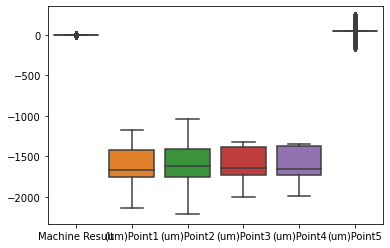

In [112]:
sns.boxplot(data=MC2Mean)
plt.show()

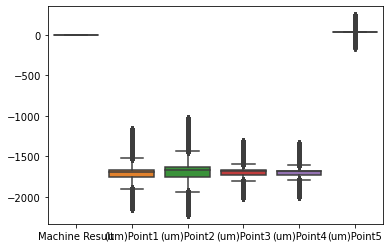

In [113]:
sns.boxplot(data=MC2Median)
plt.show()

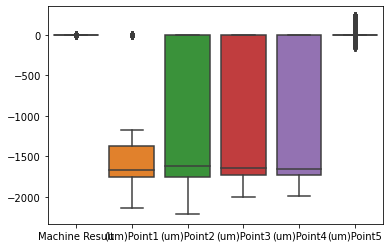

In [114]:
sns.boxplot(data=MC2Zero)
plt.show()

## Splitting and Normalizing MC2Mean

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC2Mean.drop('Machine Result', axis=1)
y = le.fit_transform(MC2Mean['Machine Result'])

In [116]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


## KNN MC2Mean

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning KNN
Mean squared error: 0.019965532648241528
Accuracy score: 0.9800344673517585
Precision score:  0.9819562527967151
Recall score:  0.9974199240682317
F1 score:  0.9896276842677703
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      3531
           1       0.98      1.00      0.99     74804

    accuracy                           0.98     78335
   macro avg       0.95      0.80      0.86     78335
weighted avg       0.98      0.98      0.98     78335



In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print(classification_report(ytest, ypred))

After tuning KNN
Mean squared error: 0.04401608476415395
Accuracy score: 0.955983915235846
Precision score:  0.9620066300631928
Recall score:  0.9931287096946687
F1 score:  0.9773199673744309
              precision    recall  f1-score   support

           0       0.54      0.17      0.26      3531
           1       0.96      0.99      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.75      0.58      0.62     78335
weighted avg       0.94      0.96      0.94     78335



## GaussianNB MC2Mean

In [90]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.14149486181145082
Accuracy score: 0.8585051381885492
Precision score:  0.9829467939972715
Recall score:  0.8668654082669376
F1 score:  0.9212638697486752
              precision    recall  f1-score   support

           0       0.19      0.68      0.30      3531
           1       0.98      0.87      0.92     74804

    accuracy                           0.86     78335
   macro avg       0.59      0.77      0.61     78335
weighted avg       0.95      0.86      0.89     78335



In [118]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse )
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre )
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.0450756366885811
Accuracy score: 0.9549243633114189
Precision score:  0.9549243633114189
Recall score:  1.0
F1 score:  0.976942516276063
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3531
           1       0.95      1.00      0.98     74804

    accuracy                           0.95     78335
   macro avg       0.48      0.50      0.49     78335
weighted avg       0.91      0.95      0.93     78335



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomForestClassifier MC2Mean

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.01941660815727325
Accuracy score: 0.9805833918427268
Precision score:  0.9822201750345463
Recall score:  0.9977273942569916
F1 score:  0.9899130573185047
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      3531
           1       0.98      1.00      0.99     74804

    accuracy                           0.98     78335
   macro avg       0.95      0.81      0.87     78335
weighted avg       0.98      0.98      0.98     78335



In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=67)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.04308418969809153
Accuracy score: 0.9569158103019084
Precision score:  0.9615886678815607
Recall score:  0.9946125875621624
F1 score:  0.9778218784704652
              precision    recall  f1-score   support

           0       0.58      0.16      0.25      3531
           1       0.96      0.99      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.77      0.58      0.61     78335
weighted avg       0.94      0.96      0.94     78335



## Comparing Model Results

In [121]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1)
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC2Mean')
bestmodel


,KNN,GNB,RFC
Accuracy,0.955984,0.954924,0.956916
Mean-squared Error,0.044016,0.045076,0.043084
Precision,0.962007,0.954924,0.961589
Recall,0.993129,1.000000,0.994613
F1,0.977320,0.976943,0.977822


## Splitting and Normalizing MC2Median

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC2Median.drop('Machine Result', axis=1)
y = le.fit_transform(MC2Median['Machine Result'])

In [124]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC2Median

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning KNN
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning KNN
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


## GaussianNB MC2Median

In [127]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning GaussianNB
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0


C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [128]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=1.0)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0


C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



## RandomForestClassifier MC2Median

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

Before tuning RandomForestClassifier
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=1)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.0
Accuracy score: 1.0
Precision score:  0.0
Recall score:  0.0


C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nathan Ting\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


F1 score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78335

    accuracy                           1.00     78335
   macro avg       1.00      1.00      1.00     78335
weighted avg       1.00      1.00      1.00     78335



## Splitting and Normalizing MC2Zero

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC2Zero.drop('Machine Result', axis=1)
y = le.fit_transform(MC2Zero['Machine Result'])

In [24]:
#train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#normalizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

## KNN MC2Zero

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("Before tuning KNN")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
print("After tuning KNN")
KNNmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", KNNmse)
KNNacc=accuracy_score(ytest, ypred)
print("Accuracy score:", KNNacc)
KNNpre=precision_score(ytest, ypred)
print("Precision score: ", KNNpre)
KNNrec=recall_score(ytest, ypred)
print("Recall score: ", KNNrec) #balance between precision and recall
KNNF1=f1_score(ytest, ypred)
print("F1 score: ", KNNF1)

print(classification_report(ytest, ypred))

After tuning KNN
Mean squared error: 0.043786302419097464
Accuracy score: 0.9562136975809026
Precision score:  0.9621351428349434
Recall score:  0.9932356558472809
F1 score:  0.9774380698038494
              precision    recall  f1-score   support

           0       0.55      0.17      0.26      3531
           1       0.96      0.99      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.75      0.58      0.62     78335
weighted avg       0.94      0.96      0.95     78335



## GaussianNB MC2Zero

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("Before tuning GaussianNB")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [26]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report

gnb = GaussianNB(var_smoothing=0.657933224657568)
gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)
print("After tuning GaussianNB")
GNBmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", GNBmse )
GNBacc=accuracy_score(ytest, ypred)
print("Accuracy score:", GNBacc)
GNBpre=precision_score(ytest, ypred)
print("Precision score: ", GNBpre )
GNBrec=recall_score(ytest, ypred)
print("Recall score: ", GNBrec) #balance between precision and recall
GNBF1=f1_score(ytest, ypred)
print("F1 score: ", GNBF1)

print(classification_report(ytest, ypred))

After tuning GaussianNB
Mean squared error: 0.16486883257803026
Accuracy score: 0.8351311674219698
Precision score:  0.9854267651811066
Recall score:  0.8397679268488316
F1 score:  0.9067852271004901
              precision    recall  f1-score   support

           0       0.18      0.74      0.29      3531
           1       0.99      0.84      0.91     74804

    accuracy                           0.84     78335
   macro avg       0.58      0.79      0.60     78335
weighted avg       0.95      0.84      0.88     78335



## RandomForestClassifier MC2Zero

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier()
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("Before tuning RandomForestClassifier")
print("Mean squared error:", mean_squared_error(ytest, ypred))
print("Accuracy score:", accuracy_score(ytest, ypred))
print("Precision score: ", precision_score(ytest, ypred))
print("Recall score: ", recall_score(ytest, ypred)) #balance between precision and recall
print("F1 score: ", f1_score(ytest, ypred))

print(classification_report(ytest, ypred))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


rfc=RandomForestClassifier(n_estimators=51)
rfc.fit(Xtrain, ytrain)


ypred = rfc.predict(Xtest)
print("After tuning RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print(classification_report(ytest, ypred))

After tuning RandomForestClassifier
Mean squared error: 0.04302036126890917
Accuracy score: 0.9569796387310908
Precision score:  0.9614837976122798
Recall score:  0.9947997433292337
F1 score:  0.9778580814717477
              precision    recall  f1-score   support

           0       0.59      0.16      0.25      3531
           1       0.96      0.99      0.98     74804

    accuracy                           0.96     78335
   macro avg       0.77      0.58      0.61     78335
weighted avg       0.94      0.96      0.94     78335



## Comparing Model Results

In [28]:
bestmodel = pd.DataFrame({'KNN' : (KNNacc, KNNmse, KNNpre, KNNrec, KNNF1),
                          'GNB' : (GNBacc, GNBmse, GNBpre, GNBrec, GNBF1),
                          'RFC' : (RFCacc, RFCmse, RFCpre, RFCrec, RFCF1)
                          }, index=['Accuracy', 'Mean-squared Error', 'Precision', 'Recall', 'F1'])
bestmodel = bestmodel.style.set_caption('MC2Zero')
bestmodel


,KNN,GNB,RFC
Accuracy,0.956214,0.835131,0.956980
Mean-squared Error,0.043786,0.164869,0.043020
Precision,0.962135,0.985427,0.961484
Recall,0.993236,0.839768,0.994800
F1,0.977438,0.906785,0.977858


## Deployment 

## Checking The Model to be Deployed

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1Zero.drop('Machine Result', axis=1)
y = le.fit_transform(MC1Zero['Machine Result'])

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score, classification_report


deployed=RandomForestClassifier(n_estimators=51)
deployed.fit(Xtrain, ytrain)


ypred = deployed.predict(Xtest)
print("Tuned RandomForestClassifier")
RFCmse=mean_squared_error(ytest, ypred)
print("Mean squared error:", RFCmse)
RFCacc=accuracy_score(ytest, ypred)
print("Accuracy score:", RFCacc)
RFCpre=precision_score(ytest, ypred)
print("Precision score: ", RFCpre)
RFCrec=recall_score(ytest, ypred)
print("Recall score: ", RFCrec) #balance between precision and recall
RFCF1=f1_score(ytest, ypred)
print("F1 score: ", RFCF1)

print(classification_report(ytest, ypred))

Tuned RandomForestClassifier
Mean squared error: 0.011882506594278983
Accuracy score: 0.988117493405721
Precision score:  0.9901577633419164
Recall score:  0.9976952152668941
F1 score:  0.9939121992180324
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2169
           1       0.99      1.00      0.99     75929

    accuracy                           0.99     78098
   macro avg       0.94      0.83      0.87     78098
weighted avg       0.99      0.99      0.99     78098



## Process of Storing, Loading and Using The Model

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = MC1Zero.drop('Machine Result', axis=1)
y = le.fit_transform(MC1Zero['Machine Result'])

from sklearn.model_selection import train_test_split
import pickle
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

#best model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=51)
rfc.fit(Xtrain, ytrain)

# save the model to disk
filename = '(rfc)deployed_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [28]:
# load the model from disk
deployed = pickle.load(open(filename, 'rb'))

In [29]:
def prediction (P1, P2, P3, P4, P5):
    if (P1==''):
        P1=0
    if (P2==''):
        P2=0
    if (P3==''):
        P3=0
    if (P4==''):
        P4=0
    if (P5==''):
        P5=0   
        
    prediction = deployed.predict([[P1,P2,P3,P4,P5]])
    
    if (prediction==[0]):
        predicted='NG'
    else:
        predicted='OK'
    
    return predicted
        

In [30]:
def main():
    
    P1=input("Enter value of Point 1(um): " )
    P2=input("Enter value of Point 2(um): " )
    P3=input("Enter value of Point 3(um): " )
    P4=input("Enter value of Point 4(um): " )
    P5=input("Enter value of Point 5(um): " )
    
    result=prediction(P1,P2,P3,P4,P5)
    print("Predicted Machine Result: " , result)
    return


In [33]:
main()

Enter value of Point 1(um): -1706.9
Enter value of Point 2(um): -1605.4
Enter value of Point 3(um): -1580.9
Enter value of Point 4(um): -1620.8
Enter value of Point 5(um): 
Predicted Machine Result:  NG
